In [8]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## [Premier League by Yuvan Ron](https://rapidapi.com/yuvr99-WHTEITBQbOc/api/premier-league18)

### Getting Top Scorers from the API

In [ ]:
url = 'https://premier-league18.p.rapidapi.com/players/topScorers'

headers = {
    'x-rapidapi-key': "bd4e85cc6bmsh1b3c1ef1973b4e8p11a529jsn0cc133d8fe1e",
    'x-rapidapi-host': "premier-league18.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Error: {response.status_code}")
    print(response.text)
else:
    top_scorers = response.json()

In [ ]:
print(" " * 20 , "TOP SCORERS")
for i in top_scorers:
    print(f"{i['name'].title()}", f"Team: {i['team']['name']}" , f"Goals: {i['goals']}" , f"Assists: {i['assists']}", f"{i['appearances']}", sep='\n')
    print("-"*50)

### Getting All players from the API

In [ ]:
url = 'https://premier-league18.p.rapidapi.com/players'

response = requests.get(url, headers=headers)
if response.status_code != 200:
    print(f"Error: {response.status_code}")
    print(response.text)
else:
    players = response.json()

### Removing the extra nested team data and replacing it with only the team name

In [ ]:
# Removing the unnecesary extra team data
players = [{**entry, 'team': entry['team']['name']} for entry in players]
players

### Creating a csv file of the data to have it locally stored

In [32]:
# players_data = pd.DataFrame(players)
# players_data.to_csv('player_data.csv')
players_data = pd.read_csv('player_data.csv').drop('Unnamed: 0', axis=1)
players_data.head()


,_id,name,team,country,position,age,dateOfBirth,height,shirtNumber,goals,assists,appearances,firstTeamAppearances,minutesPlayed,yellowCards,redCards
0,66c5b3caf98db29296783a18,adam webster,brighton,england,centre back,29,1995-01-04T00:00:00.000Z,1.90,4.0,0,0,11,8,693,0,0
1,66c5b3caf98db29296783a14,jason steele,brighton,england,goalkeeper,34,1990-08-18T00:00:00.000Z,1.88,23.0,0,0,2,2,202,0,0
2,66c5b3caf98db29296783a13,bart verbruggen,brighton,netherlands,goalkeeper,22,2002-08-18T00:00:00.000Z,1.94,1.0,0,1,27,27,2671,4,0
3,66c5b3caf98db29296783a1f,yasin ayari,brighton,sweden,central midfield,21,2003-10-06T00:00:00.000Z,1.72,26.0,0,1,25,16,1579,3,0
4,66c5b3caf98db29296783a22,jakub moder,brighton,poland,central midfield,25,1999-04-07T00:00:00.000Z,1.91,15.0,0,0,4,0,42,0,0


In [33]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   630 non-null    object 
 1   name                  630 non-null    object 
 2   team                  630 non-null    object 
 3   country               630 non-null    object 
 4   position              630 non-null    object 
 5   age                   630 non-null    int64  
 6   dateOfBirth           595 non-null    object 
 7   height                625 non-null    float64
 8   shirtNumber           618 non-null    float64
 9   goals                 630 non-null    int64  
 10  assists               630 non-null    int64  
 11  appearances           630 non-null    int64  
 12  firstTeamAppearances  630 non-null    int64  
 13  minutesPlayed         630 non-null    int64  
 14  yellowCards           630 non-null    int64  
 15  redCards              6

In [34]:
players_data.describe()

,age,height,shirtNumber,goals,assists,appearances,firstTeamAppearances,minutesPlayed,yellowCards,redCards
count,630.000000,625.000000,618.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,25.449206,1.830816,20.616505,1.284127,0.974603,13.249206,9.698413,949.863492,1.847619,0.050794
std,4.426017,0.071894,15.053449,2.791693,1.791871,10.384337,9.728974,896.218489,2.199643,0.240477
min,16.000000,1.620000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
25%,22.000000,1.780000,9.000000,0.000000,0.000000,2.000000,0.000000,36.500000,0.000000,0.000000
50%,25.000000,1.830000,19.000000,0.000000,0.000000,14.000000,7.000000,766.000000,1.000000,0.000000
75%,28.000000,1.880000,29.000000,1.000000,1.000000,23.000000,18.000000,1722.750000,3.000000,0.000000
max,39.000000,2.050000,97.000000,27.000000,16.000000,30.000000,30.000000,2840.000000,10.000000,2.000000


### Introducing a goals_per_minute column to get a more accurate statistic on the scoring rate of the players

In [36]:
players_data['goals_per_minute'] = players_data['goals'] / players_data['minutesPlayed'] 
players_data['goals_per_minute'].fillna(0, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9432\1153199085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players_data['goals_per_minute'].fillna(0, inplace=True)


## Exploratory Data Analysis

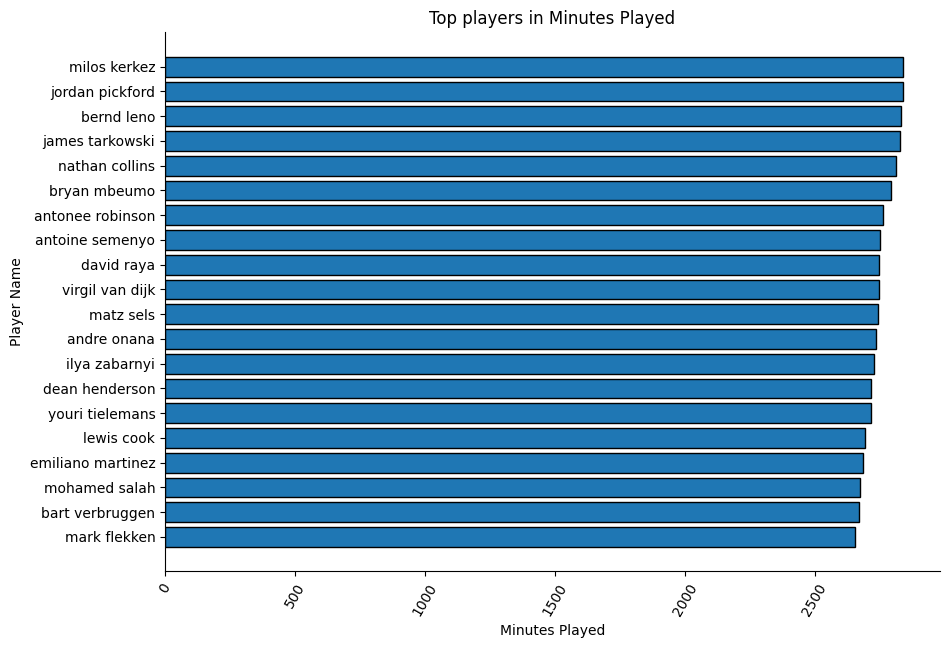

In [133]:
# Getting the players with the most minutes played

plt.figure(figsize=(10, 7))

# Resetting the style to default
plt.style.use('default')

plt.barh(
    y=players_data.sort_values(by='minutesPlayed', ascending=True)['name'][-20:], 
    width=players_data.sort_values(by='minutesPlayed', ascending=True)['minutesPlayed'][-20:], 
    edgecolor='black'
)
plt.title('Top players in Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Player Name')
plt.xticks(rotation=60)
sns.despine()
plt.show()


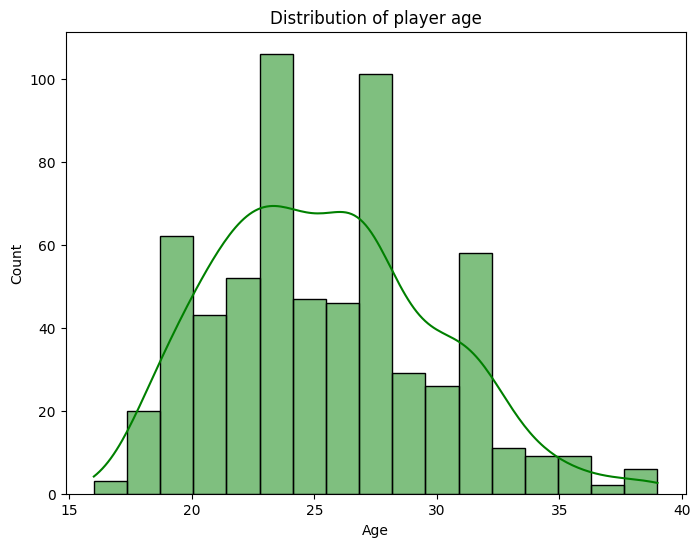

In [118]:
# Getting the player age distribution across the league

plt.figure(figsize=(8,6))
sns.histplot(data=players_data, x='age', kde=True, color='green')
plt.title('Distribution of player age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

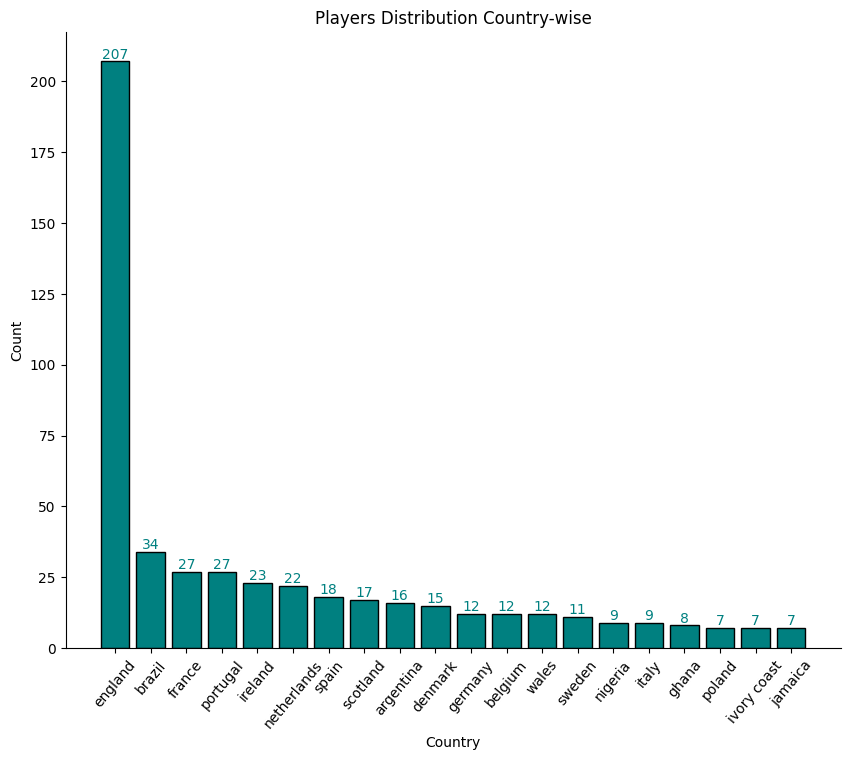

In [119]:
# Getting the distribution of players based on their country

plt.figure(figsize=(10,8))
country_group = players_data.groupby('country').count()['_id'].sort_values(ascending=False)

plt.bar(country_group.index[:20], country_group[:20], color='teal', ec='black')
plt.title('Players Distribution Country-wise')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=50)
sns.despine()

index=0
for i in range(len(country_group.index[:20])):
    plt.text(i, country_group.iloc[i], country_group.iloc[i], ha='center', va='bottom', color='teal')
    index+=1
plt.show()

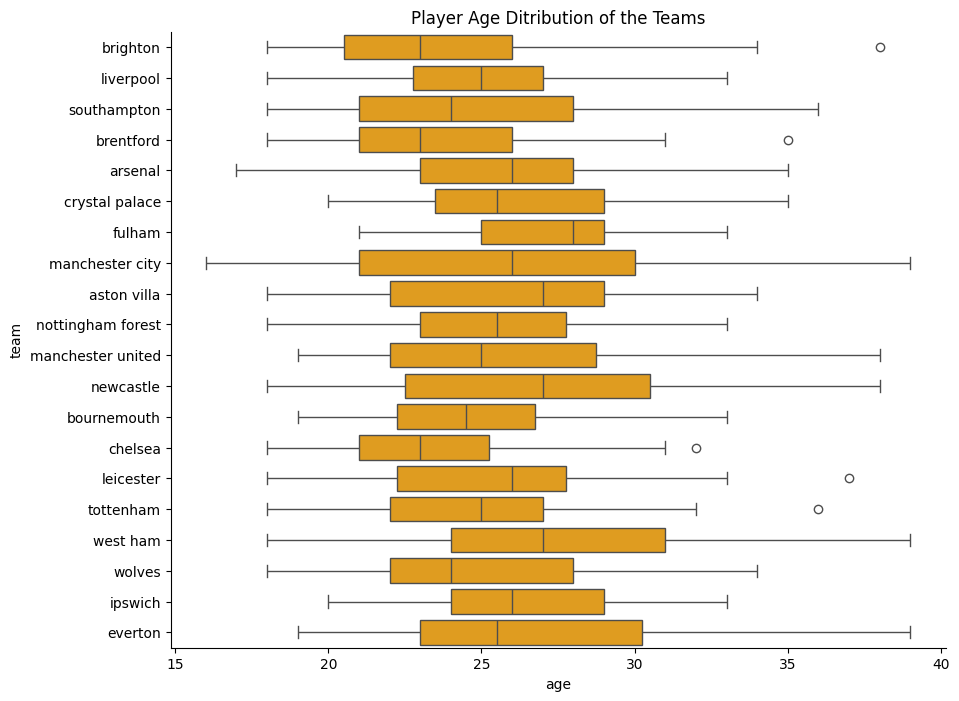

In [120]:
# Getting the distribution of players based on their team

players_data
plt.figure(figsize=(10,8))
sns.boxplot(data=players_data, x=players_data['age'], y=players_data['team'], color='orange')
plt.title('Player Age Ditribution of the Teams')
sns.despine()
plt.show()

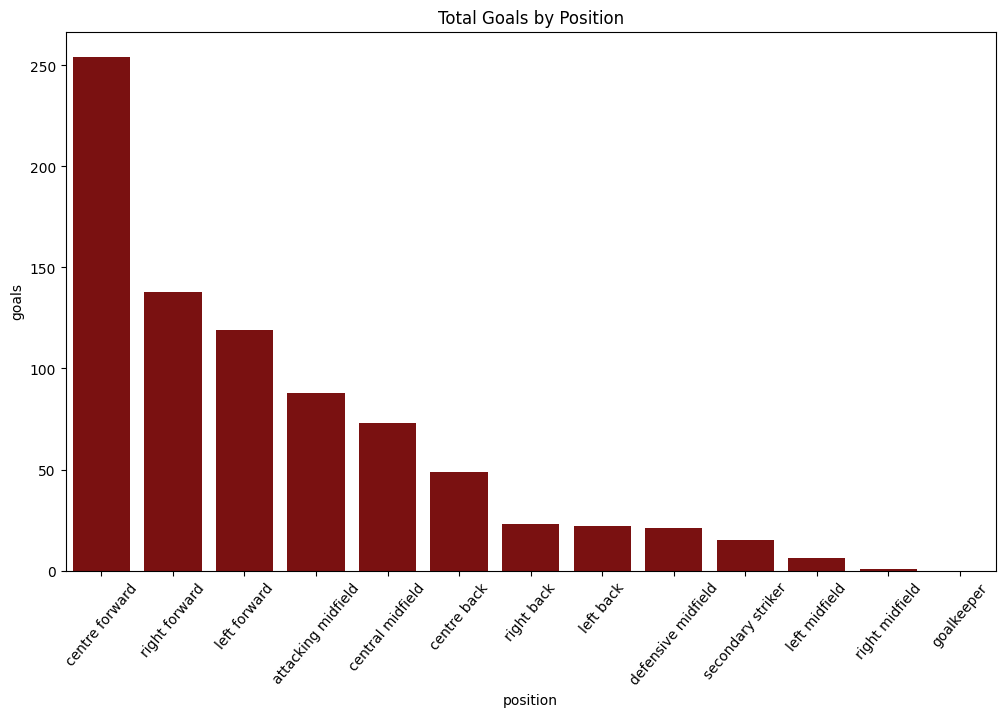

In [121]:
position_group = players_data.groupby('position')['goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x=position_group.index, y=position_group, color='darkred')
plt.title('Total Goals by Position')
plt.xticks(rotation=50)
plt.show()


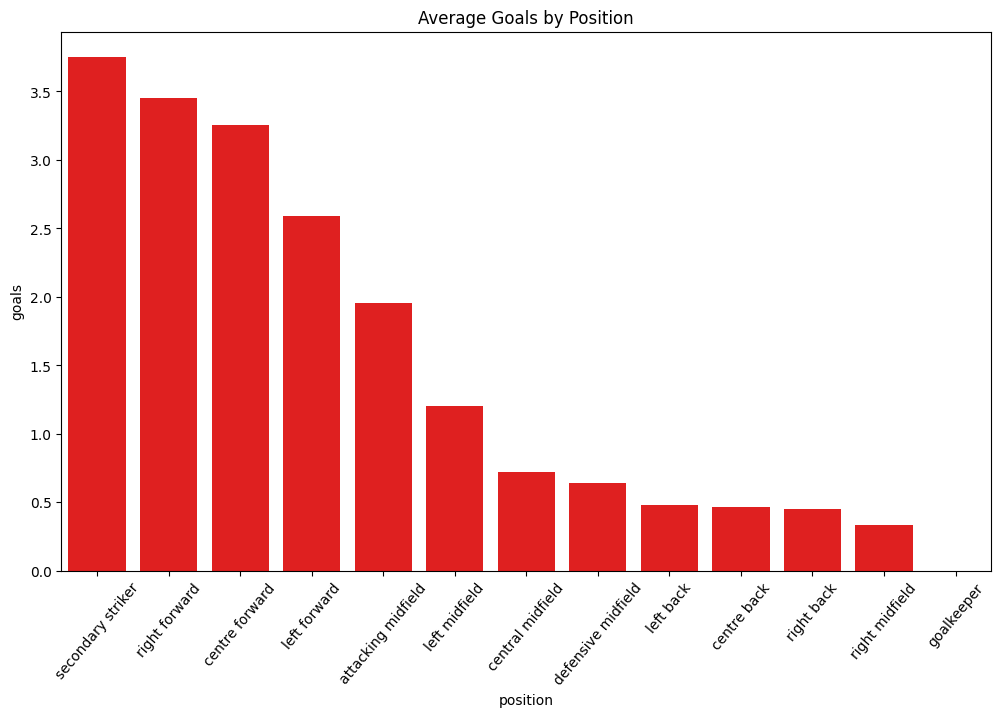

In [122]:
position_group = players_data.groupby('position')['goals'].mean().sort_values(ascending=False)

# making the background color black
# plt.style.use('dark_background')
plt.figure(figsize=(12,7))
sns.barplot(x=position_group.index, y=position_group, color='red')
plt.title('Average Goals by Position')
plt.xticks(rotation=50)
plt.show()

### Getting the teams data from the API

In [123]:
url = 'https://premier-league18.p.rapidapi.com/teams'

response =  requests.get(url, headers=headers)

if response.status_code != 200:
    print(f'Error: {response.status_code}')
    print(response.text)
else:
    teams = response.json()

removing the player data since we already have that

In [124]:
teams = [{key: value for key, value in entry.items() if key != 'players'} for entry in teams]

### Creating a csv for teams_data

In [ ]:
teams_data = pd.DataFrame(teams)
teams_data.to_csv('teams_data.csv')

teams_data = pd.read_csv('teams_data.csv').drop('Unnamed: 0', axis=1)
teams_data.head()

,_id,name,points,matchesPlayed,wins,draws,losses,goalsScored,goalsConceded,goalDifference,coach,championships,runnersUp,imageUrl
0,66a51e73841d8a52475a9533,leicester,17,25,4,5,16,25,55,-30,steve cooper,1,1,https://res.cloudinary.com/dwdcrimvk/image/upl...
1,66a51e73841d8a52475a953a,chelsea,46,28,13,7,8,52,37,15,enzo maresca,6,4,https://res.cloudinary.com/dwdcrimvk/image/upl...
2,66a51e73841d8a52475a953b,everton,33,28,7,12,9,31,35,-4,sean dyche,9,7,https://res.cloudinary.com/dwdcrimvk/image/upl...
3,66a51e73841d8a52475a953c,liverpool,67,28,20,7,1,67,27,40,arne slot,19,15,https://res.cloudinary.com/dwdcrimvk/image/upl...
4,66a51e73841d8a52475a953e,manchester city,48,29,14,6,9,55,40,15,pep guardiola,10,6,https://res.cloudinary.com/dwdcrimvk/image/upl...


In [126]:
teams_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             20 non-null     object
 1   name            20 non-null     object
 2   points          20 non-null     int64 
 3   matchesPlayed   20 non-null     int64 
 4   wins            20 non-null     int64 
 5   draws           20 non-null     int64 
 6   losses          20 non-null     int64 
 7   goalsScored     20 non-null     int64 
 8   goalsConceded   20 non-null     int64 
 9   goalDifference  20 non-null     int64 
 10  coach           20 non-null     object
 11  championships   20 non-null     int64 
 12  runnersUp       20 non-null     int64 
 13  imageUrl        20 non-null     object
dtypes: int64(10), object(4)
memory usage: 2.3+ KB


In [127]:
teams_data.describe()

,points,matchesPlayed,wins,draws,losses,goalsScored,goalsConceded,goalDifference,championships,runnersUp
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,38.450000,28.000000,10.450000,7.10000,10.450000,42.000000,42.00000,0.000000,4.800000,4.400000
std,14.376424,1.376494,4.536112,2.38195,5.500957,11.720428,11.82326,21.506425,6.354443,5.195139
min,9.000000,25.000000,2.000000,3.00000,1.000000,21.000000,23.00000,-49.000000,0.000000,0.000000
25%,31.500000,28.000000,7.000000,5.00000,8.000000,33.250000,34.50000,-9.000000,0.000000,0.000000
50%,40.000000,28.000000,11.500000,7.00000,9.000000,42.500000,40.00000,4.000000,1.500000,2.000000
75%,46.250000,29.000000,12.250000,9.00000,12.750000,49.000000,45.50000,12.750000,7.500000,6.250000
max,67.000000,29.000000,20.000000,12.00000,24.000000,67.000000,70.00000,40.000000,20.000000,17.000000


### Creating a position feature

In [128]:
teams_data.head()

,_id,name,points,matchesPlayed,wins,draws,losses,goalsScored,goalsConceded,goalDifference,coach,championships,runnersUp,imageUrl
0,66a51e73841d8a52475a9533,leicester,17,25,4,5,16,25,55,-30,steve cooper,1,1,https://res.cloudinary.com/dwdcrimvk/image/upl...
1,66a51e73841d8a52475a953a,chelsea,46,28,13,7,8,52,37,15,enzo maresca,6,4,https://res.cloudinary.com/dwdcrimvk/image/upl...
2,66a51e73841d8a52475a953b,everton,33,28,7,12,9,31,35,-4,sean dyche,9,7,https://res.cloudinary.com/dwdcrimvk/image/upl...
3,66a51e73841d8a52475a953c,liverpool,67,28,20,7,1,67,27,40,arne slot,19,15,https://res.cloudinary.com/dwdcrimvk/image/upl...
4,66a51e73841d8a52475a953e,manchester city,48,29,14,6,9,55,40,15,pep guardiola,10,6,https://res.cloudinary.com/dwdcrimvk/image/upl...


### Ranking in terms of points

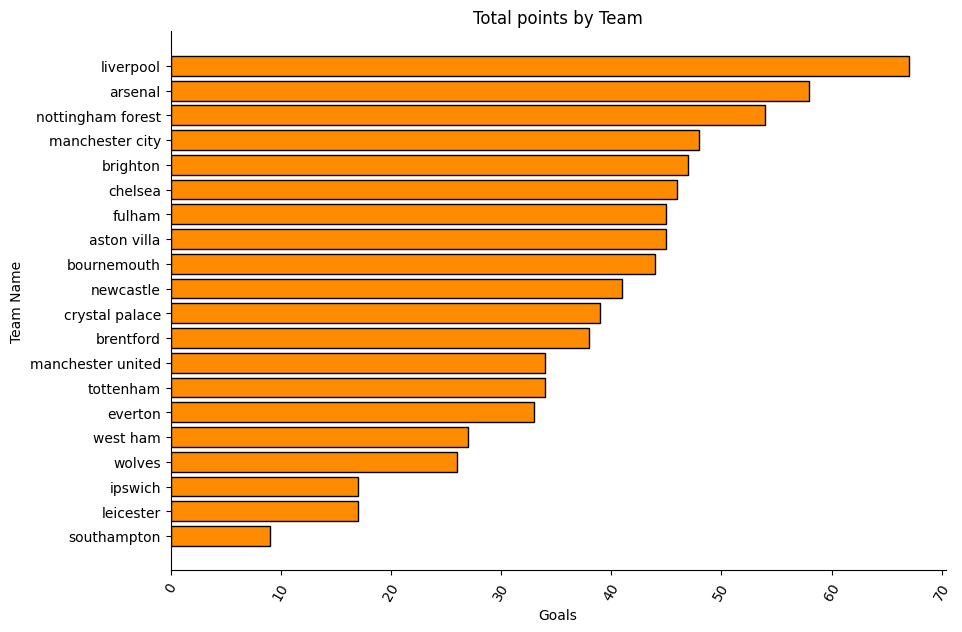

In [151]:
plt.figure(figsize=(10,7))

plt.barh(data=teams_data.sort_values(by='points', ascending=True), width='points', y='name', color='darkorange', ec='black')
plt.title('Total points by Team')
plt.ylabel('Team Name')
plt.xlabel('Goals')
plt.xticks(rotation=60)
sns.despine()   
plt.show()


### Ranking in terms of Championships

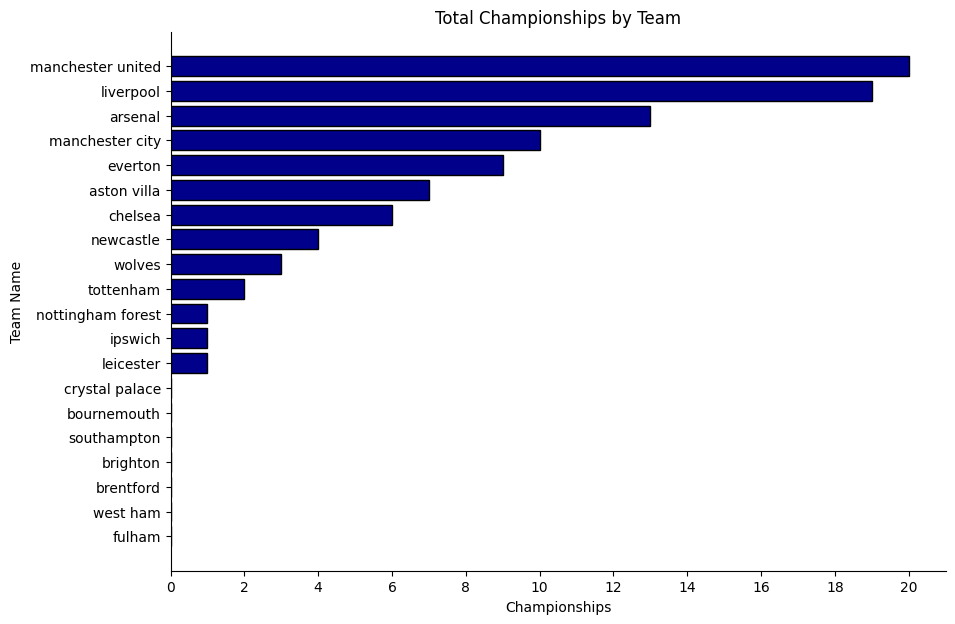

In [152]:
plt.figure(figsize=(10,7))
# ranking in terms of championships

plt.barh(data=teams_data.sort_values(by='championships', ascending=True), width='championships', y='name', color='darkblue', ec='black')
plt.title('Total Championships by Team')
plt.ylabel('Team Name')
plt.xlabel('Championships')
plt.xticks(ticks=range(0, 22, 2))
sns.despine()
plt.show()

### Relation between goalsScored and goalsConceded

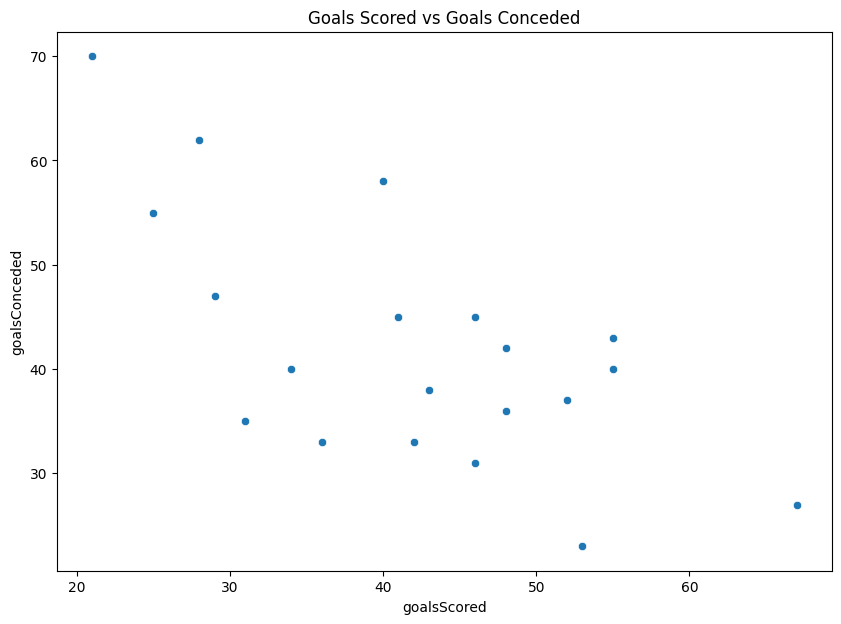

In [130]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=teams_data['goalsScored'], y=teams_data['goalsConceded'])
plt.title('Goals Scored vs Goals Conceded')
plt.show()


### Relation between points accumulated and goalScored

In [131]:
# rounding off the max points to the nearest tens
round(teams_data['points'].max(), -1)

np.int64(70)

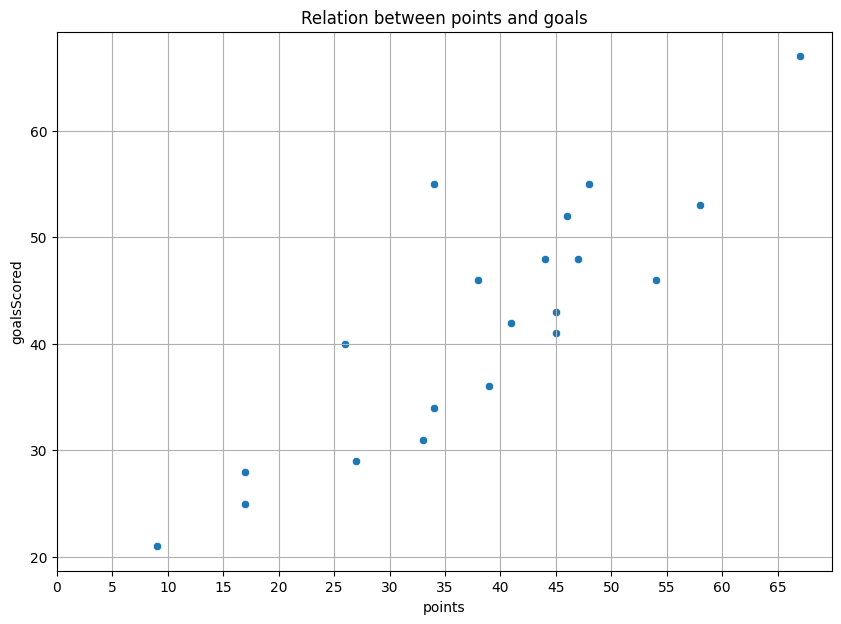

In [132]:
# Relation between points and goals
plt.figure(figsize=(10,7))
sns.scatterplot(x=teams_data['points'], y=teams_data['goalsScored'])
plt.title('Relation between points and goals')
plt.grid()
plt.xticks(ticks=range(0, round(teams_data['points'].max(), -1), 5))
plt.show()

In [138]:
teams_data

,_id,name,points,matchesPlayed,wins,draws,losses,goalsScored,goalsConceded,goalDifference,coach,championships,runnersUp,imageUrl
0,66a51e73841d8a52475a9533,leicester,17,25,4,5,16,25,55,-30,steve cooper,1,1,https://res.cloudinary.com/dwdcrimvk/image/upl...
1,66a51e73841d8a52475a953a,chelsea,46,28,13,7,8,52,37,15,enzo maresca,6,4,https://res.cloudinary.com/dwdcrimvk/image/upl...
2,66a51e73841d8a52475a953b,everton,33,28,7,12,9,31,35,-4,sean dyche,9,7,https://res.cloudinary.com/dwdcrimvk/image/upl...
3,66a51e73841d8a52475a953c,liverpool,67,28,20,7,1,67,27,40,arne slot,19,15,https://res.cloudinary.com/dwdcrimvk/image/upl...
4,66a51e73841d8a52475a953e,manchester city,48,29,14,6,9,55,40,15,pep guardiola,10,6,https://res.cloudinary.com/dwdcrimvk/image/upl...
5,66a51e73841d8a52475a953f,west ham,27,25,7,6,12,29,47,-18,julen lopetegui,0,0,https://res.cloudinary.com/dwdcrimvk/image/upl...
6,66a51e73841d8a52475a9542,fulham,45,29,12,9,8,43,38,5,marco silva,0,0,https://res.cloudinary.com/dwdcrimvk/image/upl...
7,66a51e73841d8a52475a9531,wolves,26,29,7,5,17,40,58,-18,gary o'neil,3,5,https://res.cloudinary.com/dwdcrimvk/image/upl...
8,66a51e73841d8a52475a9534,nottingham forest,54,28,16,6,6,46,31,15,nuno espirito santo,1,2,https://res.cloudinary.com/dwdcrimvk/image/upl...
9,66a51e73841d8a52475a9535,brighton,47,29,12,11,6,48,42,6,fabian hurzeler,0,0,https://res.cloudinary.com/dwdcrimvk/image/upl...
